# Exploratory Data Analyst (EDA)

## Explore the sales advertising dataset to understand data structure, key variables, and initial patterns before modeling.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/sca-programming-school/datasets/main/sales_advertising.csv'
df = pd.read_csv(url)

## Initial Data Inspection
Preview the first few rows to understand the dataset structure and available features

In [3]:
#Data profiling
df.head()

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
0,437.086107,227.135984,149.687216,1099.406439,7753.504975
1,955.642876,263.046047,145.524769,1544.144191,11683.762317
2,758.794548,434.546327,112.930487,1212.800205,8910.744929
3,638.792636,203.001974,250.521225,349.944650,3339.284889
4,240.416776,441.342358,157.564771,534.044426,4361.964031


## Data Overview and Missing Values Check
Inspect data types, non-null counts, and overall dataset structure to identify potential data quality issues.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             4985 non-null   float64
 1   radio_ads          4982 non-null   float64
 2   newspaper_ads      4977 non-null   float64
 3   digital_marketing  4974 non-null   float64
 4   sales              4982 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


## Handling Missing Values
Several variables contain missing values.
Median imputation is applied to handle missing data, as it is more robust to outliers compared to mean imputation.

In [5]:
#Handling missing values
df.tv_ads = df.tv_ads.fillna(df.tv_ads.median())
df.radio_ads = df.radio_ads.fillna(df.radio_ads.median())
df.newspaper_ads = df.newspaper_ads.fillna(df.newspaper_ads.median())
df.digital_marketing = df.digital_marketing.fillna(df.digital_marketing.median())
df.sales = df.sales.fillna(df.sales.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             5000 non-null   float64
 1   radio_ads          5000 non-null   float64
 2   newspaper_ads      5000 non-null   float64
 3   digital_marketing  5000 non-null   float64
 4   sales              5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


## Post-Imputation Data Check
Re-check the dataset to ensure all missing values have been handled successfully.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tv_ads             5000 non-null   float64
 1   radio_ads          5000 non-null   float64
 2   newspaper_ads      5000 non-null   float64
 3   digital_marketing  5000 non-null   float64
 4   sales              5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


All variables are numerical and contain no missing values, making the dataset suitable for correlation analysis and OLS regression modeling

## Descriptive Statistics
Analyze the distribution, central tendency, and dispersion of numerical variables to understand overall spending patterns and sales behavior.

In [7]:
#Descriptive statistics
df.describe()

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,553.647557,271.139975,165.324609,1114.607915,7758.880139
std,308.713477,128.326513,78.316621,516.792532,2783.684163
min,100.010471,50.023772,30.042591,200.454418,1043.825466
25%,322.006422,161.556102,97.158244,676.864933,5488.027904
50%,550.361031,268.687208,163.928071,1124.985865,7836.046852
75%,773.756056,379.688170,234.915304,1551.461061,9973.557046
max,6735.856228,499.777335,299.947389,1999.864688,14322.724102


Key observations:
- Sales show a wide range, indicating significant variation in business performance.
- Digital marketing has the highest average spending among advertising channels.
- TV advertising exhibits high variability, suggesting potential outliers.


## Outlier Detection Using IQR Method
Identify potential outliers using the Interquartile Range (IQR) to assess whether extreme values may influence model performance.
TV advertising is examined first due to its high variance observed in descriptive statistics.

In [8]:
#Handling outliers
#------------------
#outliners for tv_ads
Q1_tv = df.tv_ads.quantile(0.25)
Q3_tv = df.tv_ads.quantile(0.75)
IQR_tv = Q3_tv - Q1_tv
tv_lower_bound = Q1_tv - 1.5 * IQR_tv
tv_upper_bound = Q3_tv + 1.5 * IQR_tv

#outliners for radio_ads
Q1_radio = df.radio_ads.quantile(0.25)
Q3_radio = df.radio_ads.quantile(0.75)
IQR_radio = Q3_radio - Q1_radio
radio_lower_bound = Q1_radio - 1.5 * IQR_radio
radio_upper_bound = Q3_radio + 1.5 * IQR_radio

#outliners for newspaper_ads
Q1_np = df.newspaper_ads.quantile(0.25)
Q3_np = df.newspaper_ads.quantile(0.75)
IQR_np = Q3_np - Q1_np
np_lower_bound = Q1_np - 1.5 * IQR_np
np_upper_bound = Q3_np + 1.5 * IQR_np

#outliners for digital_marketing
Q1_dm = df.digital_marketing.quantile(0.25)
Q3_dm = df.digital_marketing.quantile(0.75)
IQR_dm = Q3_dm - Q1_dm
dm_lower_bound = Q1_dm - 1.5 * IQR_dm
dm_upper_bound = Q3_dm + 1.5 * IQR_dm

#outliners for sales
Q1_sale = df.sales.quantile(0.25)
Q3_sale = df.sales.quantile(0.75)
IQR_sale = Q3_sale - Q1_sale
sale_lower_bound = Q1_sale - 1.5 * IQR_sale
sale_upper_bound = Q3_sale + 1.5 * IQR_sale

#Remove outliners
df_clean = df[
    (df.tv_ads >= tv_lower_bound) & (df.tv_ads <= tv_upper_bound) &
    (df.radio_ads >= radio_lower_bound) & (df.radio_ads <= radio_upper_bound) &
    (df.newspaper_ads >= np_lower_bound) & (df.newspaper_ads <= np_upper_bound) &
    (df.digital_marketing >= dm_lower_bound) & (df.digital_marketing <= dm_upper_bound) &
    (df.sales >= sale_lower_bound) & (df.sales <= sale_upper_bound)
]

df_clean.describe()


,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
count,4993.000000,4993.000000,4993.000000,4993.000000,4993.000000
mean,547.753586,271.082572,165.273424,1114.737047,7758.781233
std,260.796601,128.322100,78.296286,516.924810,2784.038849
min,100.010471,50.023772,30.042591,200.454418,1043.825466
25%,321.761830,161.515599,97.150932,676.832948,5488.821895
50%,550.361031,268.687208,163.928071,1124.985865,7836.046852
75%,773.265861,379.604583,234.866213,1551.859331,9971.967887
max,1438.167858,499.777335,299.947389,1999.864688,14322.724102


Extreme outliers are removed to reduce their influence on regression coefficients and improve model stability.

## Correlation Analysis
Analyze linear relationships between advertising channels and sales to identify the most influential factors for revenue growth.

In [9]:
#Build and visualize correlation matrix
corr_matrix = df_clean.corr()
corr_matrix.head()

,tv_ads,radio_ads,newspaper_ads,digital_marketing,sales
tv_ads,1.000000,-0.006618,0.001219,0.028083,0.302539
radio_ads,-0.006618,1.000000,-0.007956,-0.001578,0.091481
newspaper_ads,0.001219,-0.007956,1.000000,-0.001150,-0.002362
digital_marketing,0.028083,-0.001578,-0.001150,1.000000,0.934176
sales,0.302539,0.091481,-0.002362,0.934176,1.000000


The heatmap below provides a visual overview of correlation strengths and directions, making it easier to identify dominant sales drivers.

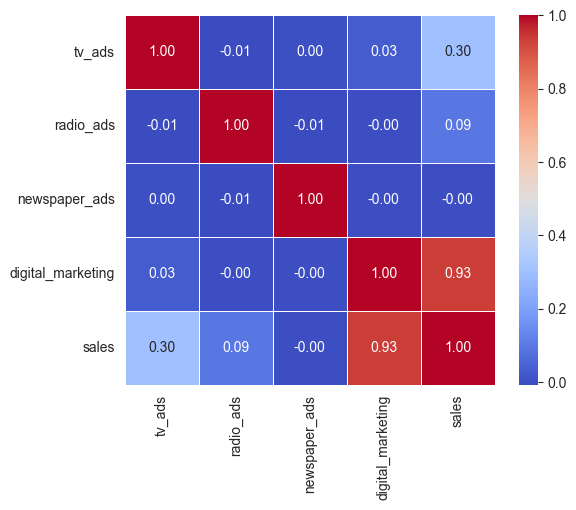

In [10]:
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=.5,
            square=True
)
plt.show()

Key insights from correlation matrix:
- Digital marketing shows a very strong positive correlation with sales (≈ 0.93), indicating it is the primary sales driver.
- TV advertising has a moderate positive correlation with sales.
- Radio and newspaper advertising show weak or negligible relationships with sales.

Based on the correlation analysis, digital marketing and TV advertising are selected as key predictors for the OLS regression model to explain and predict sales performance.

# Regression

## OLS Regression Model
An OLS regression model is built to quantify the impact of each advertising channel on sales and provide interpretable coefficients for business decision-making.

In [11]:
#Fit a regression model
X = df[['tv_ads', 'radio_ads', 'newspaper_ads', 'digital_marketing']]
Y = df['sales']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.890e+04
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:51:20   Log-Likelihood:                -39800.
No. Observations:                5000   AIC:                         7.961e+04
Df Residuals:                    4995   BIC:                         7.964e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               458.0980     41.23

### Model Performance
The OLS model explains approximately **93.8%** of the variance in sales (R-squared = 0.938), indicating an excellent overall fit.
The model is statistically significant with a near-zero F-test p-value.

`newspaper_ads` was excluded from the model due to its lack of statistical significance (high P>|t|), and the model was refitted accordingly.

In [12]:
#Fit a regression model
X_new = df[['tv_ads', 'radio_ads', 'digital_marketing']]
Y = df['sales']

X_new = sm.add_constant(X_new)

model_new = sm.OLS(Y, X_new).fit()

print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 2.520e+04
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:51:20   Log-Likelihood:                -39800.
No. Observations:                5000   AIC:                         7.961e+04
Df Residuals:                    4996   BIC:                         7.963e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               447.5455     35.58

TV advertising has a statistically significant positive effect on sales, though its impact is notably smaller than digital marketing.

Radio advertising contributes positively to sales but with a more moderate effect compared to digital and TV advertising.

Newspaper advertising shows no statistically significant relationship with sales, suggesting limited effectiveness in driving revenue.

The intercept represents the estimated baseline sales when all advertising spends are zero.

### Key Business Insights
- Digital marketing is the most effective channel and should be prioritized in budget allocation.
- TV and radio advertising play supporting roles in driving sales.
- Newspaper advertising shows minimal impact and may be deprioritized to optimize marketing ROI.